# Beispiel 9.2: Parallelreaktion im CSTR
Bearbeitet von Amke Wiesner

Dieses Beispiel befindet sich im Lehrbuch auf den Seiten 117 - 119. Die Nummerierung der verwendeten Gleichnungen entspricht der Nummerierung im Lehrbuch. Das hier angewendete Vorgehen entspricht dem im Lehrbuch vorgestellten Lösungsweg.

# Code

Zunächst werden die benötigten Pakete importiert. Das Paket sklearn wird für die linearen Regressionen verwendet. 
Hilfestellungen und Alternativen zum Paket sklearn sind unter folgendem Link zu finden:
https://realpython.com/linear-regression-in-python/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Bekannte Werte aus der Aufgabenstellung werden in Variablen und Arrays angelegt.

In [2]:
tau = np.array([3,     6,     9,     12,    15   ])   # Zeit    aus Tabelle 9.1
c_1 = np.array([0.645, 0.425, 0.298, 0.250, 0.198])   # Konz. 1 aus Tabelle 9.1
c_2 = np.array([0.672, 0.847, 0.930, 0.990, 1.030])   # Konz. 2 aus Tabelle 9.1

c_1e = 1.5  # kmol / m³    # Zulaufkonzentration Komp. 1
c_2e = 0    # kmol / m³    # Zulaufkonzentration Komp. 2
c_3e = 0    # kmol / m³    # Zulaufkonzentration Komp. 3

## Berechnen der Reaktionsgeschwindigkeiten $r_1$ und $r_2$
Zunächst werden für jeden Zeitpunkt die Reaktionsgeschwindigkeiten $r_1$ und $r_2$ berechnet. Die Herleitung der verwendeten Gleichungen kann im Lehrbuch im Beispiel 9.2 nachgelesen werden. Zur Berechnung von $r_1$ wird folgende Formel verwendet:
\begin{equation*}
r_\text{1} = \frac{c_\text{2}}{\overline{\tau}}
\end{equation*}

In [3]:
r_1  = np.divide(c_2, tau)
print('r1 / kmol/(m³ min):')
print(r_1)

r1 / kmol/(m³ min):
[0.224      0.14116667 0.10333333 0.0825     0.06866667]


Die Reaktionsgeschwindigkeit $r_2$ berechnet sich wie folgt:
\begin{equation*}
r_\text{2} = \frac{c_\text{1,e} - c_\text{1}}{\overline{\tau}} - r_\text{1}
\end{equation*}

In [4]:
r_2 = np.subtract(np.divide(np.subtract(c_1e, c_1), tau), r_1)
print('r2 / kmol/(m³ min):')
print(r_2)

r2 / kmol/(m³ min):
[0.061      0.038      0.03022222 0.02166667 0.01813333]


Die berechneten Werte für $r_\text{1}$ und $r_\text{2}$ werden in einer Grafik dargestellt.

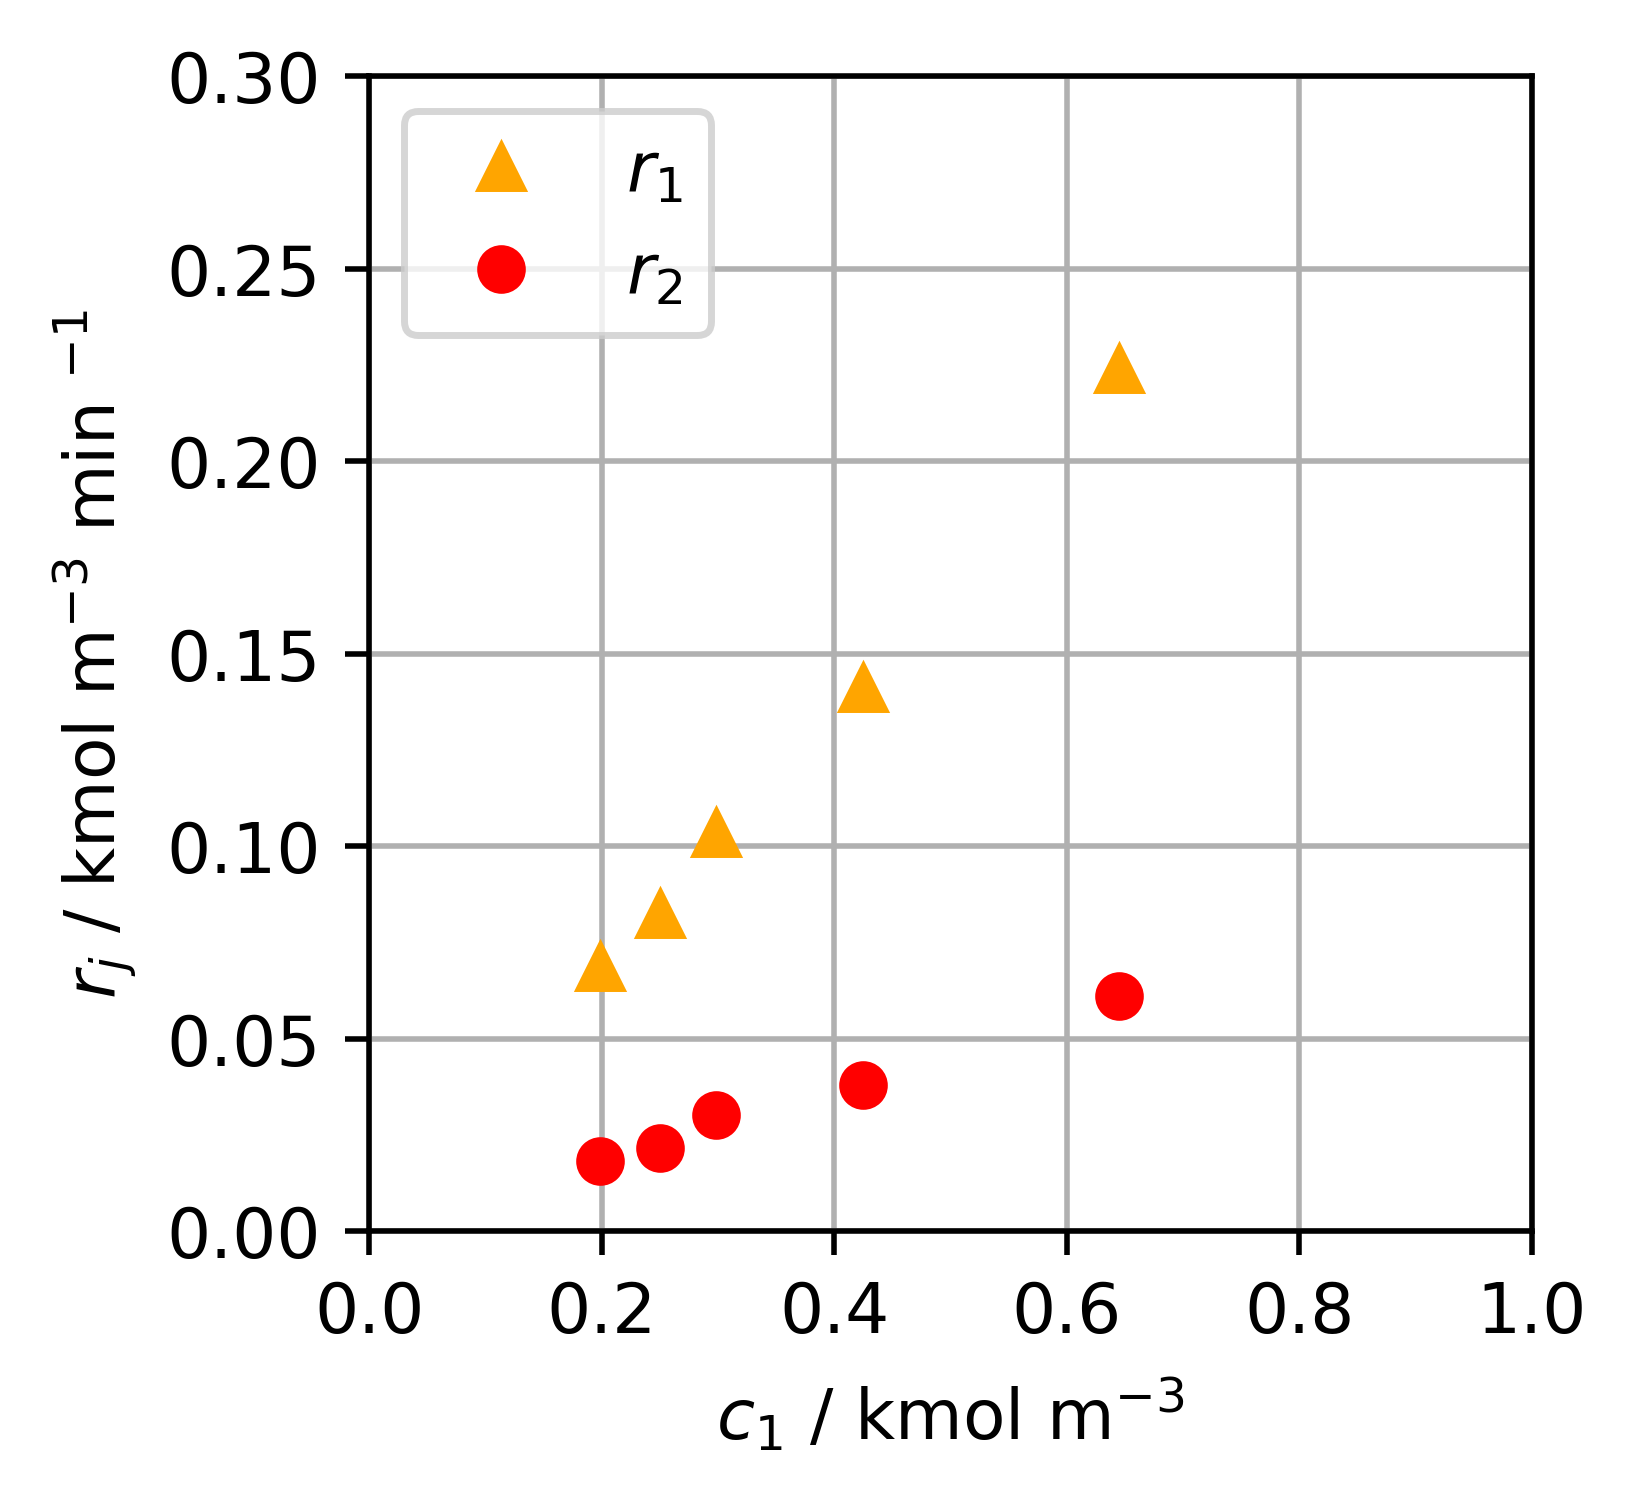

In [5]:
plt.figure(figsize = (3,3), dpi = 500)
plt.plot(c_1, r_1, '^', color = 'orange', label = '$r_1$')
plt.plot(c_1, r_2, 'o', color = 'red',    label = '$r_2$')

plt.xlabel('$c_1$ / kmol m$^{-3}$')
plt.ylabel('$r_j$ / kmol m$^{-3}$ min $^{-1}$')
plt.xlim(0, 1)
plt.ylim(0, 0.3)

plt.legend(loc = 'upper left')
plt.grid(True)
plt.show()

## Lineare Regression für $r_\text{1}$ und $r_\text{2}$ erstellen

### Vorgehen für $r_\text{1}$

*Reshape c_1*, um eine 2-dimensionale Matrix zu erhalten:

In [6]:
c_1_res = c_1. reshape(-1,1)
print(c_1_res)

[[0.645]
 [0.425]
 [0.298]
 [0.25 ]
 [0.198]]


Erstellen des Regressionsmodells:

Durch das Argument *fit\_intercept = False* wird der y-Achsenabschnitt gleich null gesetzt. Die Regressionsgerade verläuft also durch den Ursprung des Koordinatensystems. 

Für *fit\_intercept = True* wird der y-Achsenabschnitt frei angepasst.

In [7]:
model_1 = LinearRegression(fit_intercept = False).fit(c_1_res, r_1)

In [8]:
r_sq_1 = model_1.score(c_1_res, r_1)
print('coefficient of determation:', r_sq_1)
k_1 = model_1.coef_
print('k1: ', k_1)
b_1 = model_1.intercept_
print('b1 : ', b_1)

coefficient of determation: 0.9973597086926237
k1:  [0.34235842]
b1 :  0.0


Für die Darstellung im Diagramm wird an dieser Stelle die Regressionsfunktion mit den ermittelten Koffizienten *k1* und *b_1* angelegt. Die Konzentration *c_1* wird für die Darstellung als *np.linspace* angelegt.

In [9]:
def r_1_reg(c_1_reg):
    return k_1 * c_1_reg + b_1

c_1_reg = np.linspace(0, 1.5, 16)

Dieses Vorgehen wird für die Reaktionsgeschwindigkeit $r_\text{2}$ wiederholt.

### Vorgehen für $r_\text{2}$

In [10]:
model_2 = LinearRegression(fit_intercept = False).fit(c_1_res, r_2)

In [11]:
r_sq_2 = model_2.score(c_1_res, r_2)
print('coefficient of determation:', r_sq_2)
k_2 =model_2.coef_
print('k2: ', k_2)
b_2 = model_2.intercept_
print('b2: ', b_2)

coefficient of determation: 0.9895812356358917
k2:  [0.09338441]
b2:  0.0


In [12]:
def r_2_reg(c_1_reg):
    return k_2 * c_1_reg + b_2

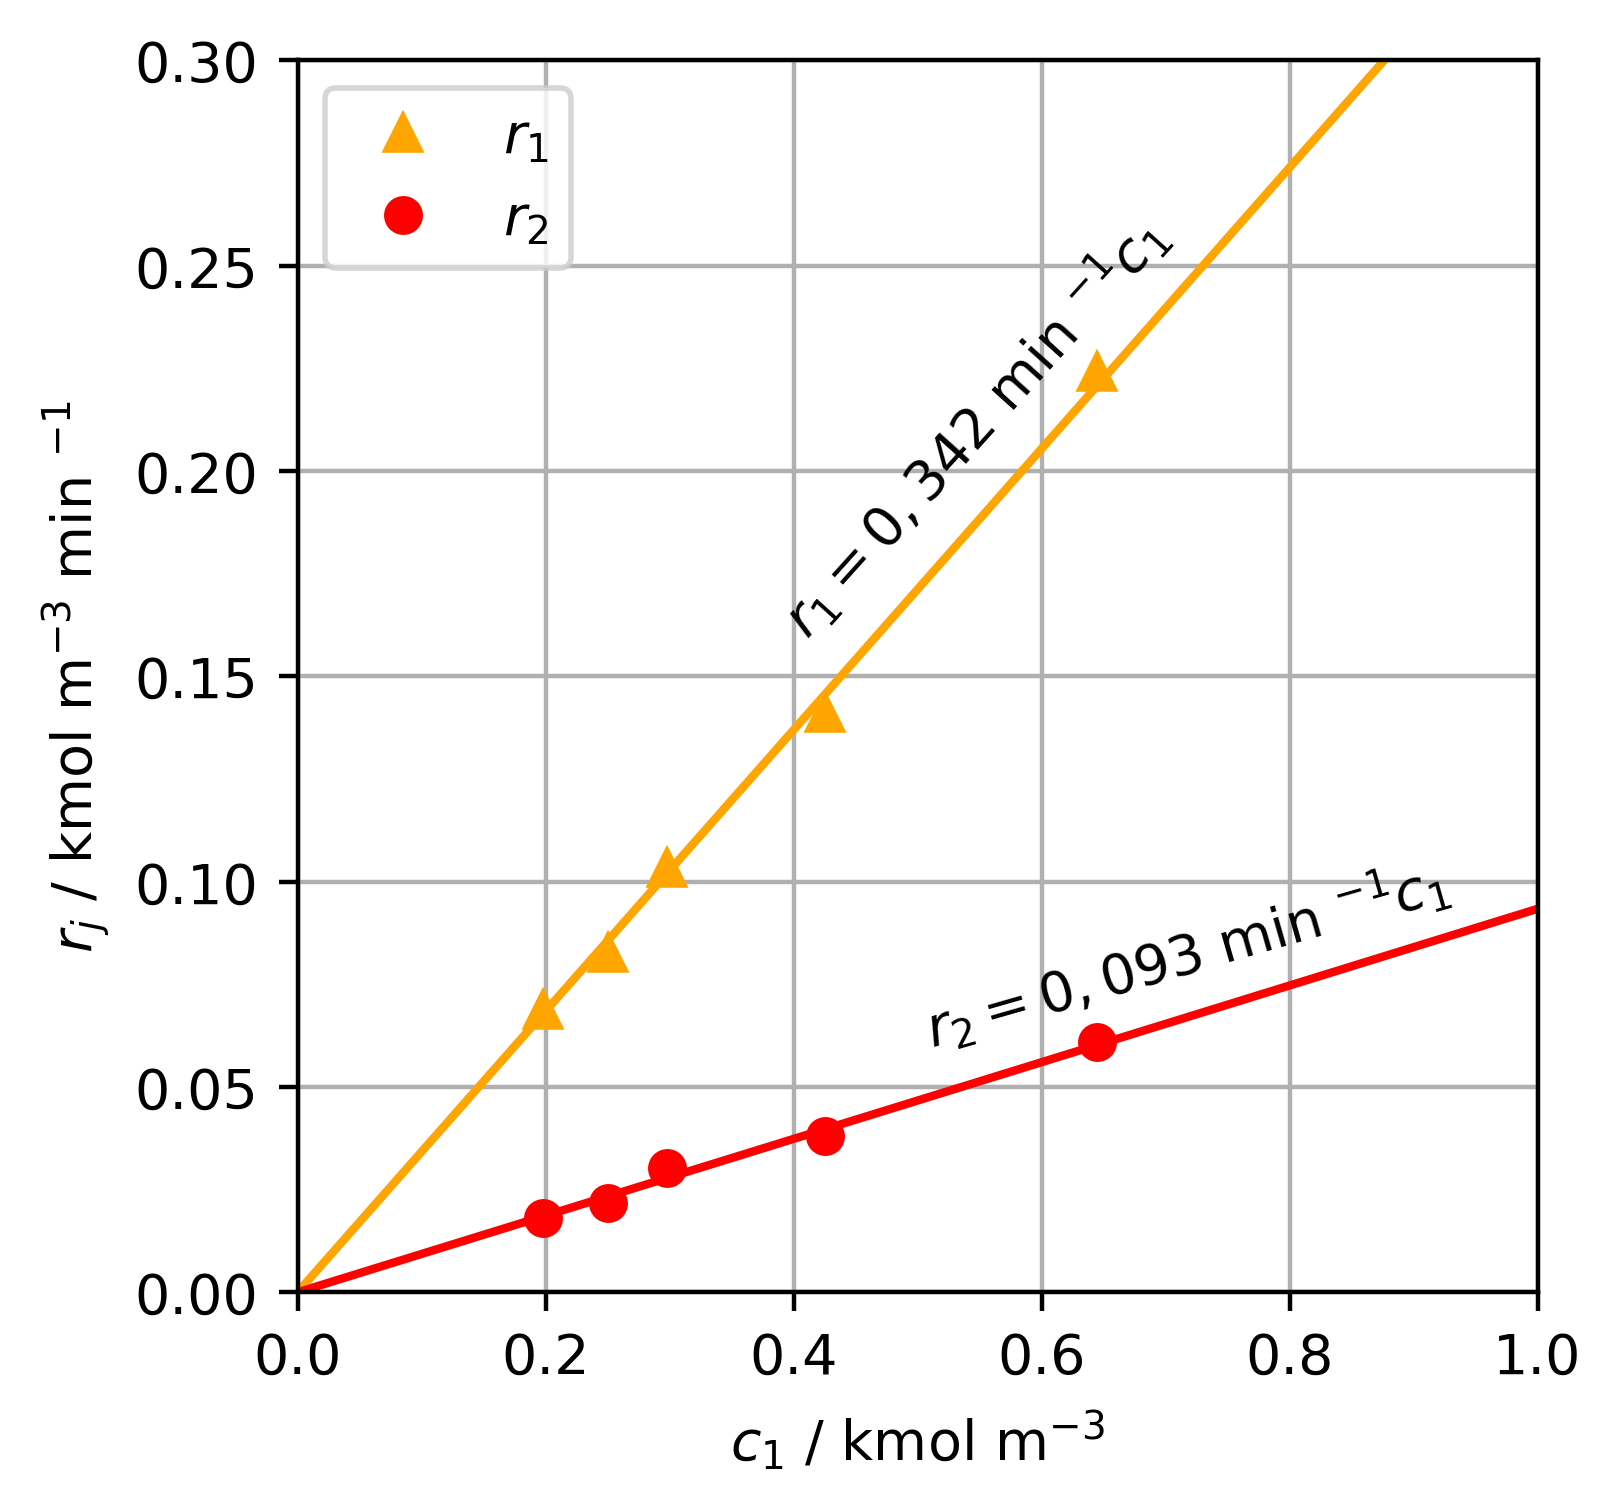

In [13]:
plt.figure(figsize = (4,4), dpi = 400)
plt.plot(c_1, r_1, '^', color = 'orange', label = '$r_1$')
plt.plot(c_1, r_2, 'o', color = 'red',    label = '$r_2$')
plt.plot(c_1_reg, r_1_reg(c_1_reg), linestyle = 'solid', color = 'orange')
plt.plot(c_1_reg, r_2_reg(c_1_reg), linestyle = 'solid', color = 'red'   )

plt.text(0.38, 0.16, ('$r_1 = 0,342$ min $^{-1} c_1$'), rotation = 48)
plt.text(0.50, 0.06, ('$r_2 = 0,093$ min $^{-1} c_1$'), rotation = 16)

plt.xlabel('$c_1$ / kmol m$^{-3}$')
plt.ylabel('$r_j$ / kmol m$^{-3}$ min $^{-1}$')
plt.xlim(0, 1)
plt.ylim(0, 0.3)

plt.legend(loc = 'upper left')
plt.grid(True)
plt.show()

## Umsatzgrad und Selektivität

Mit den nun bekannten Geschwindigkeitskonstanten $k_1$ und $k_2$ werden die Konzentrationen $c_1$ und $c_2$ nach einer Verweilzeit von $\overline{\tau} = 30$ min berechnet werden. Dazu werden die Glg. (9.22) und (9.23) verwendet.

In [14]:
tau_max = 30     # min      maximale Verweilzeit

In [15]:
# Glg. (9.22)
c1 = c_1e / (1 + tau_max * (k_1 + k_2))
print('c1: ', round(c1[0], 3), 'kmol/m³')

# Glg. (9.23)
c2 = (tau_max * k_1 * c_1e) / (1 + tau_max * (k_1 + k_2))
print('c2: ', round(c2[0], 3), 'kmol/m³')

c1:  0.107 kmol/m³
c2:  1.095 kmol/m³


Die Gleichungen, die zur Berechnung des Umsatzgrades und der Selektivität verwendet werden, sind ebenfalls dem Beispiel im Lehrbuch entnommen.

In [16]:
U = 1 - c1 / c_1e
print('Umsatzgrad: ', round(U[0], 4), ' = ', round(U[0] * 100,2), '%')

S_21 = - c2 / (c1 - c_1e)
print('Selektivität: ', round(S_21[0], 4), ' = ', round(S_21[0] * 100, 2), '%')

Umsatzgrad:  0.9289  =  92.89 %
Selektivität:  0.7857  =  78.57 %
